In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv2
import os as os

In [3]:
df = pd.read_csv("train_ship_segmentations_v2.csv")

train_folder_path = './train_v2'

In [3]:
df.shape

(231723, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231723 entries, 0 to 231722
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ImageId        231723 non-null  object
 1   EncodedPixels  81723 non-null   object
dtypes: object(2)
memory usage: 3.5+ MB


In [16]:
df['ImageId'].duplicated().sum()

39167

In [58]:
df1 = df.copy()

def group_encoded_pixels(rle_code):
    
    if type(rle_code.values[0]) != float:
        
        return ' '.join(rle_code)
    
    return 0

df1['Ship_exists'] = df1['EncodedPixels'].notnull()

df1['EncodedPixels'] = df1['EncodedPixels']

df1 = df1.groupby('ImageId').agg({'Ship_exists': ['first', 'sum'], 
                                        'EncodedPixels': lambda rle_code: group_encoded_pixels(rle_code)}).reset_index()

df1.columns = ['ImageId', 'Ship_exists', 'Number_of_ships', 'EncodedPixels_agg']

In [59]:
df1['ImageId'].duplicated().sum()

0

In [72]:
amount_of_ship_images = df1['Ship_exists'].sum()
amount_of_no_ship_images =  len(df1['ImageId']) - amount_of_ship_images
ratio_of_ship_images = amount_of_ship_images / len(df1['ImageId'])
ratio_of_no_ship_images = amount_of_no_ship_images / len(df1['ImageId'])

print(f'Amount of images with ships: {amount_of_ship_images}')
print(f'Ratio of images with ships: {round(ratio_of_ship_images, 3)}')
print(f'Amount of images with no ships: {amount_of_no_ship_images}')
print(f'Ratio of images with no ships: {round(ratio_of_no_ship_images, 3)}')
print(f'Total amount of ships in the images: {df1["Number_of_ships"].sum()}')

Amount of images with ships: 42556
Ratio of images with ships: 0.221
Amount of images with no ships: 150000
Ratio of images with no ships: 0.779
Total amount of ships in the images: 81723


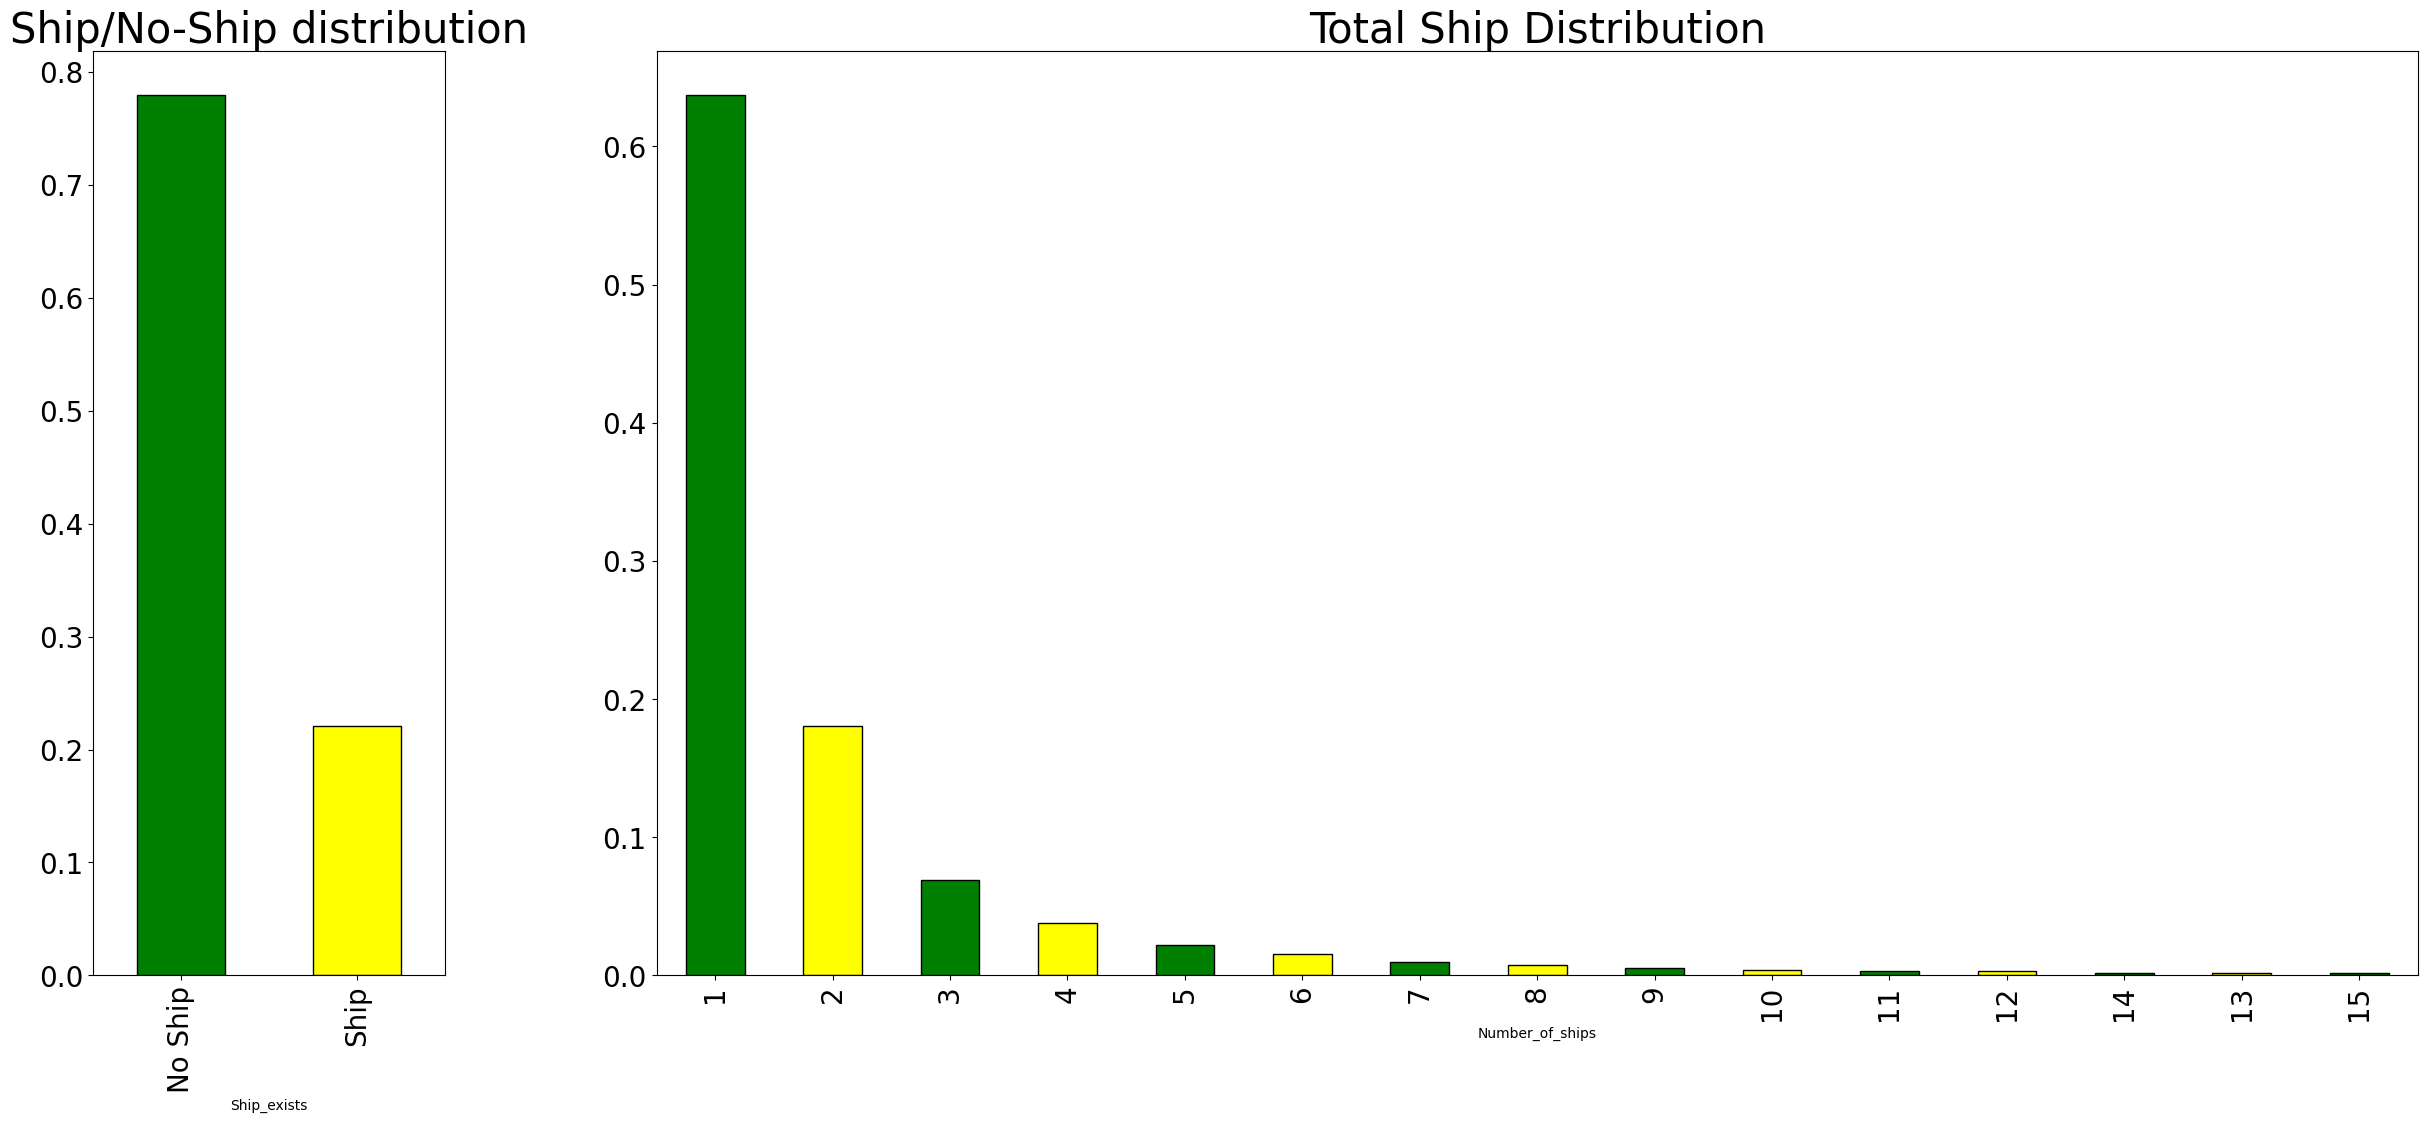

In [101]:
# Set visualization style
plt.rcParams["patch.force_edgecolor"] = True
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 12), gridspec_kw={'width_ratios':[1,5]})

ship_ratio = df1['Ship_exists'].value_counts()/len(df1['ImageId'])
ship_ratio = ship_ratio.rename(index={True:'Ship', False:'No Ship'})

total_ship_distribution = df1['Number_of_ships'].value_counts()[1::]/amount_of_ship_images

ship_ratio.plot.bar(ax=axes[0], title="Ship/No-Ship distribution", color=['green','yellow'])
total_ship_distribution.plot.bar(ax=axes[1], title="Total Ship Distribution", color=['green','yellow'])

axes[0].title.set_size(30)
axes[1].title.set_size(30)

In [61]:
df1.head(10)

,ImageId,Ship_exists,Number_of_ships,EncodedPixels_agg
0,00003e153.jpg,False,0,0
1,0001124c7.jpg,False,0,0
2,000155de5.jpg,True,1,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,True,5,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,0001b1832.jpg,False,0,0
5,00021ddc3.jpg,True,9,108287 1 109054 3 109821 4 110588 5 111356 5 1...
6,0002756f7.jpg,True,2,255784 2 256552 4 257319 7 258087 9 258854 12 ...
7,0002d0f32.jpg,False,0,0
8,000303d4d.jpg,False,0,0
9,00031f145.jpg,True,1,340363 1 341129 4 341896 6 342663 7 343429 10 ...


In [62]:
df1.tail(10)

,ImageId,Ship_exists,Number_of_ships,EncodedPixels_agg
192546,fffd924fb.jpg,True,2,110011 5 110779 5 111547 5 112315 5 113083 5 1...
192547,fffdd2377.jpg,True,1,333603 7 334359 19 335120 26 335888 26 336656 ...
192548,fffe4c385.jpg,False,0,0
192549,fffe4fa23.jpg,False,0,0
192550,fffe646cf.jpg,False,0,0
192551,fffedbb6b.jpg,False,0,0
192552,ffff2aa57.jpg,False,0,0
192553,ffff6e525.jpg,False,0,0
192554,ffffc50b4.jpg,False,0,0
192555,ffffe97f3.jpg,False,0,0


In [63]:
df1.describe(include = 'all')

,ImageId,Ship_exists,Number_of_ships,EncodedPixels_agg
count,192556,192556,192556.000000,192556.0
unique,192556,2,NaN,42557.0
top,00003e153.jpg,False,NaN,0.0
freq,1,150000,NaN,150000.0
mean,NaN,NaN,0.424412,NaN
std,NaN,NaN,1.199094,NaN
min,NaN,NaN,0.000000,NaN
25%,NaN,NaN,0.000000,NaN
50%,NaN,NaN,0.000000,NaN
75%,NaN,NaN,0.000000,NaN


In [10]:
df1.isnull().sum()

ImageId          0
EncodedPixels    0
Ships            0
ShipPresent      0
dtype: int64

In [91]:
print(df1['Ship_exists'].notnull().sum())
print(df1['EncodedPixels_agg'].notnull().sum())
print(df1['EncodedPixels_agg'].notnull().sum()/len(df1['EncodedPixels_agg']))

192556
192556
1.0


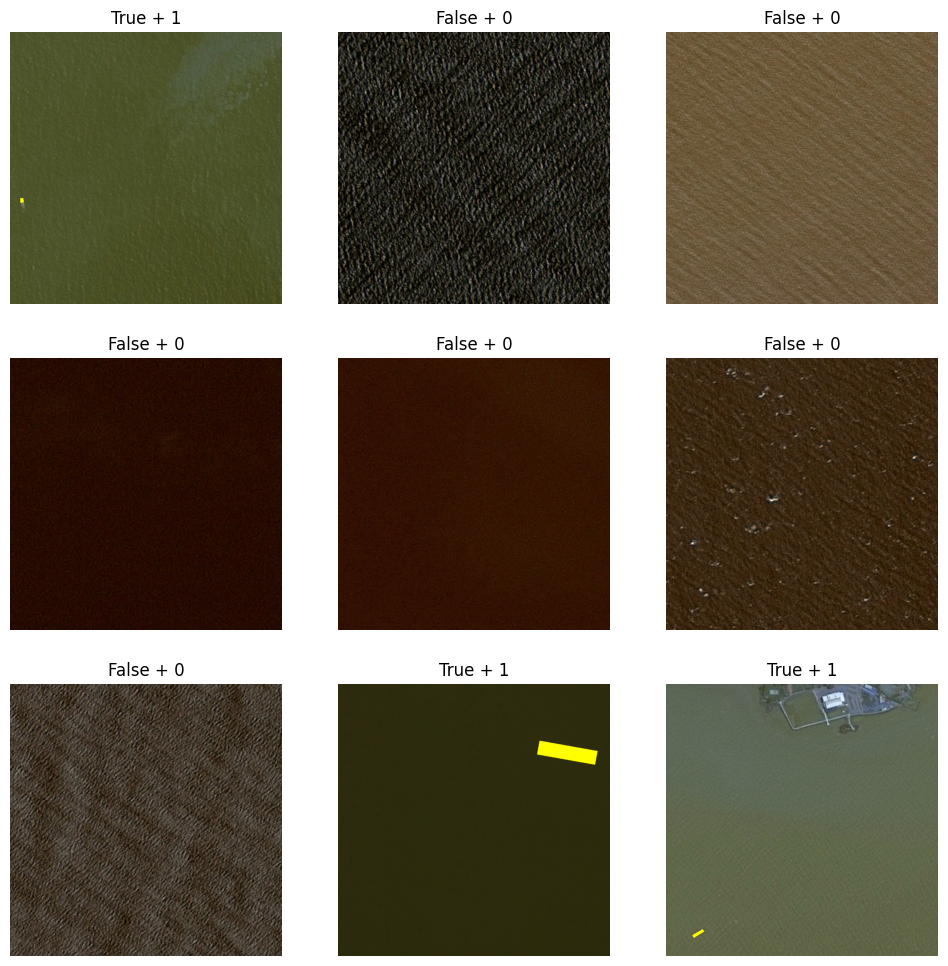

In [96]:
def rle_to_pixels(rle_code, img_shape):
    ''' This function decodes Run Length Encoding into pixels '''
    
    rle_code = [int(i) for i in rle_code.split()]
    
    pixels = [(pixel_position % img_shape[0], pixel_position // img_shape[1]) 
              for start, length in list(zip(rle_code[0:-1:2], rle_code[1::2])) 
              for pixel_position in range(start, start + length)]
        
    return pixels

def apply_mask(image, mask, color = (255, 255, 0)):
    
    ''' This function saturates the Red and Green RGB colors in the image 
        where the coordinates match the mask'''

    error_file = "error_pixels.txt"
    
    for x, y in mask:

        image[x, y, [0, 1, 2]] = color

    return image

plot_folder = './masked_plots/'

fig, ax = plt.subplots(3, 3, figsize = (12, 12))

for axis in ax.flat:
    
    axis.axis("off")
    
    index = np.random.randint(0, len(df1['ImageId']))
    
    image_path = f"{df1['ImageId'][index]}"

    image = cv2.imread(f'{train_folder_path}/{image_path}')
    
    axis.set_title(f"{df1['Ship_exists'][index]} + {df1['Number_of_ships'][index]}")
    
    found_ship = df1['Ship_exists'][index]
    
    if found_ship:
        
        mask = df1['EncodedPixels_agg'][index]
        
        mask_pixels = rle_to_pixels(mask, image.shape)
        

        image = apply_mask(image, mask_pixels)
        
    axis.imshow(image)

new_image = f"plot_{len(os.listdir(plot_folder))}"

plt.savefig(f'{plot_folder}/{new_image}.jpg')

plt.show()